# Semana 16-18 - Exercício 2

Para o sistemamodelado pela função abaixo, projete um compensador avanço de fazeque diminua o  percentual  de  sobrepassagem para  menos  de  10%. Simule  o  sistema  usando a biblioteca   demodelagem   desistemas controle,   disponível   no   Python

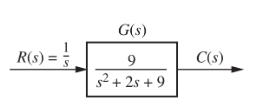

# Bibliotecas

In [11]:
from control.matlab import *
import math
import numpy as np
import matplotlib.pyplot as plt

# Funções

In [2]:
def x_dot(t,x,u):
    A = np.array([[-2.0,-0.9],[10.0,0.0]])
    B = np.array([[-1.0],[0.0]])
    xkp1 = A @ x + B @ u
    return xkp1

def rk4(tk,h,xk,uk):
    xk = xk.reshape([2,1])
    uk = uk.reshape([1,1])

    k1 = x_dot(tk,xk,uk)
    k2 = x_dot(tk+h/2.0,xk+h*k1/2.0,uk)
    k3 = x_dot(tk+h/2.0,xk+h*k2/2.0,uk)
    k4 = x_dot(tk+h,xk+h*k3,uk)

    xkp1 = xk + (h/6.0)*(k1 + 2.0*k2 + 2.0*k3 + k4)

    return xkp1.reshape([2,])


# Requisistos e Função de Transferência

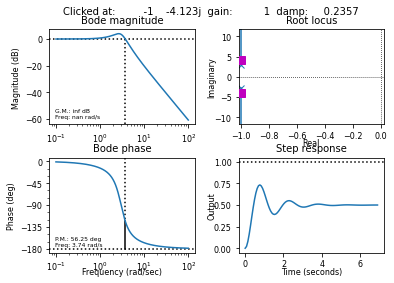

Função de Transferência: 
      9
-------------
s^2 + 2 s + 9

Controlador: 
0.8812 s + 2.133
----------------
   s + 4.729



In [7]:
MS = 0.10
ts = 2
# Função de transferencia
G = tf([9],[1,2,9])

#Auxiliares
csi = np.sqrt(np.log(MS)*np.log(MS)/(math.pi*math.pi+np.log(MS)*np.log(MS)))
wn = 4/(csi*ts)
polo = [csi*wn,wn*np.sqrt(1-csi*csi)]
poloComplex = -polo[0]+polo[1]*1j
theta = math.atan(polo[1]/polo[0])
psi = math.pi/2 - theta
beta = (math.pi - theta)/2
gamma = theta+beta-psi/2-math.pi/2
a = polo[0] + polo[1]*math.tan(gamma)
b = polo[0] + polo[1]*math.tan(gamma+psi)
C = tf([1,a],[1,b])
K = abs(1/(evalfr(C,poloComplex)*evalfr(G,poloComplex)))
#Controlador Lead
Clead = K*C

#Plots e Prints
plt.figure()
rlist, klist = rlocus(G)
sisotool(G)
plt.show()
print(f'Função de Transferência: {G}')
print(f'Controlador: {Clead}')



# Letra A

a) Efetue a simulação por meio do comando‘lsim’, uma entrada em degrau.

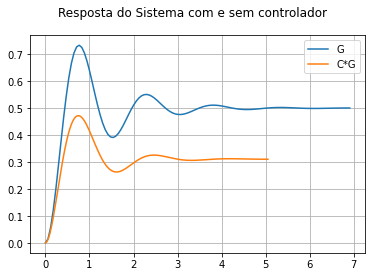

In [16]:
T1 = feedback(G)
T2 = feedback(Clead*G)
yout1, tout1 = step(T1)
yout2, tout2 = step(T2)
plt.figure()
plt.suptitle('Resposta do Sistema com e sem controlador')
plt.plot(tout1,yout1,label='G')
plt.plot(tout2,yout2,label='C*G')
plt.grid()
plt.legend()
plt.show()

# Letra B

b) Converta o controlador para o tempo discreto(𝑇𝑠=0,01[𝑠])e efetua a simulação, por meio da função Runge-Kutta.

In [17]:
#Requisitos
Ts = 0.01
Cd = c2d(C,Ts,method = 'zoh')
k1_u = 0.9764
k2_u = 0.9538

Gss = tf2ss(G)

h = 1e-4
maxT = 10
mult = Ts/h
t = np.arange(0,maxT,h)
tu = np.arange(0,maxT,Ts)


x = np.zeros([2,len(t)])
u = np.zeros([len(tu)])
r = np.ones([len(t)-1])
y = np.zeros([len(t)-1])

kmax = len(t)-1

ekm1 = 0
ukm1 = 0
p = 0
for k in range(kmax):
    y[k] = Gss.C @ x[:,k]
    if (k%mult)==0:
        ek = r[k]-y[k]
        u[p] = k2_u * ukm1 + K * (ek - k1_u * ekm1)
        ekm1 = ek
        ukm1 = u[p]
        p += 1
    x[:,k+1] = rk4(t[k],h,x[:,k],u[p-1])

In [18]:
Gss

StateSpace(array([[-2., -9.],
       [ 1.,  0.]]), array([[1.],
       [0.]]), array([[0., 9.]]), array([[0.]]))

## Figura 1

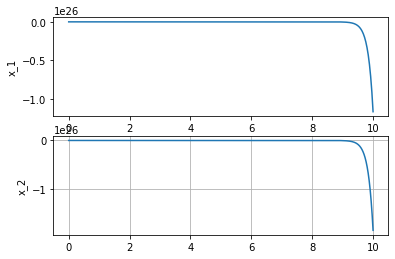

In [27]:
plt.figure(' Figura 1')
plt.subplot(2,1,1)
plt.plot(t,x[0,:])
plt.ylabel('x_1')
plt.subplot(2,1,2)
plt.plot(t,x[1,:])
plt.ylabel('x_2')
plt.grid()

## Figura 2

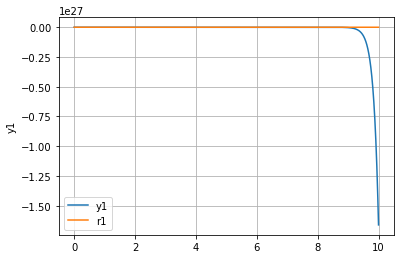

In [25]:
plt.figure('Figura 2')
plt.plot(t[0:-1],y,label='y1')
plt.plot(t[0:-1],r,label='r1')
plt.ylabel('y1')
plt.grid()
plt.legend()

## Figura 3

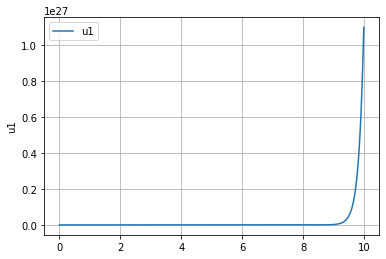

In [24]:
plt.figure('Figura 3')
plt.plot(tu[0:len(u)],u,label='u1')
plt.ylabel('u1')
plt.grid()
plt.legend()